## Project Overview

# Phishing Detection Website - Machine Learning Analysis

## Overview
This Jupyter notebook presents a comprehensive machine learning pipeline for detecting phishing websites using various classification algorithms. The project implements a complete workflow from data preprocessing to model evaluation and comparison.

## Key Features

### 🔍 Data Analysis & Preprocessing
- Loads and explores a phishing website dataset with 31 features and 11,055 entries
- Handles missing values and performs statistical analysis
- Implements feature scaling using StandardScaler

### 🤖 Machine Learning Models
1. **Support Vector Machine (SVM)**
   - Baseline implementation
   - Hyperparameter tuning using RandomizedSearchCV and GridSearchCV
   - Achieved 91.7-93.7% accuracy

2. **Random Forest Classifier**
   - Baseline implementation with 200 estimators
   - Achieved 95.7% accuracy with excellent ROC AUC score (0.991)
   - It is Best performing model  among all ,so CSV of predictions generated for further analysis


3. **XGBoost Classifier**
   - Hyperparameter tuning via RandomizedSearchCV
   - Comparative analysis with other models

### 📊 Model Evaluation & Comparison
- Comprehensive performance metrics: Accuracy, Precision, Recall, F1-Score
- Confusion matrix visualization for all models
- ROC curve analysis and AUC scores
- Detailed comparison between GridSearchCV and RandomizedSearchCV results

### 📈 Visualization
- Confusion matrix heatmaps for all three models
- Feature importance analysis
- Model performance comparison charts

## Technical Highlights
- **Data**: 32 features including URL characteristics, domain information, and web traffic metrics
- **Preprocessing**: Standard scaling, train-test split (80-20)
- **Best Performing Model**: Random Forest (95.7% accuracy)
- **Validation**: 5-fold cross-validation for robust evaluation

## Results
The Random Forest model demonstrated superior performance with:
- ✅ 95.7% Accuracy
- 📊 0.991 ROC AUC Score
- ⚡ Excellent precision and recall metrics




## Load Dataset

In [24]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from scipy.stats import uniform


#print first 10 columns
df = pd.read_csv("/kaggle/input/phishing-website-dataset/dataset.csv")
print(df.head())

#find missing values
print(df.isnull().sum())

print(df.shape)
print(df.columns)


   index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0      1                          -1              1                   1   
1      2                           1              1                   1   
2      3                           1              0                   1   
3      4                           1              0                   1   
4      5                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                 -1              -1                           -1  ...   
1               

## Data Cleaning and Preprocessing

In [25]:
#drop columns
df = df.drop(columns=['index'])
print(df.head())

#feature selection

# Features
X = df.drop(columns=['Result'])

# Target
y = df['Result']

#train & testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_test.shape)

#scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




   having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0                          -1              1                   1   
1                           1              1                   1   
2                           1              0                   1   
3                           1              0                   1   
4                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  Favicon  \
0                 -1              -1                           -1        1   
1                  0               1              

## SVM (Baseline) Predictions

In [26]:
# Default parameters SVM
svm_baseline = SVC()

# Training
svm_baseline.fit(X_scaled, y_train)

# Predictions
svm_baseline_pred = svm_baseline.predict(X_test_scaled)

svm_baseline_pred = [0 if p == -1 else 1 for p in svm_baseline_pred]

# Results
print("=============== SVM MODEL (Baseline) =================")
print("Baseline SVM Predictions (first 10):", svm_baseline_pred[:10])
print("✅ Accuracy:", accuracy_score(y_test.replace(-1, 0), svm_baseline_pred))

print("\n📑 Classification Report:\n", classification_report(y_test.replace(-1, 0), svm_baseline_pred))

cm = confusion_matrix(y_test.replace(-1, 0), svm_baseline_pred)
print("\n Confusion Matrix:\n", cm)

=============== SVM MODEL (Baseline) =================
Baseline SVM Predictions (first 10): [0, 0, 0, 1, 1, 1, 1, 0, 0, 1]
✅ Accuracy: 0.9525101763907734

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       956
           1       0.95      0.97      0.96      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211


 Confusion Matrix:
 [[ 887   69]
 [  36 1219]]


## Hyparameter Tuning through RandomizedSearchCV on SVM & Predictions

In [27]:
svm_param_dist={
    "C": uniform(0.1,10),
    'gamma':['scale','auto'],
    'kernel':['linear','rbf']
}

svm_random_search=RandomizedSearchCV(
    SVC(),
    param_distributions=svm_param_dist,
    n_iter=10,
    cv=3,
    random_state=42,
    n_jobs=-1
)
y_train_svm = y_train.replace(-1, 0)
y_test_svm = y_test.replace(-1, 0)
#fitting on randomizedsearchcv
svm_random_search.fit(X_scaled,y_train_svm)
print("==========SVM MODEL (Tuned)========================")
print("Best Parameters from RandomizedSearchCV:", svm_random_search.best_params_)

svm_model=svm_random_search.best_estimator_
svm_predict=svm_model.predict(X_test_scaled)

#prediction on randomizedsearchcv
print("====================================================")
print("Phising Detection Website Prediction Using SVM: ", svm_predict[:10])

#model evaluation 
print("=============MODEL EVALUATION OF SVM (RandomizedSearchCV)================")
acc=accuracy_score(y_test_svm,svm_predict)
print("✅ Accuracy:",acc)
print("\n📑 Classification Report:\n", classification_report(y_test_svm, svm_predict))
svm_cm = confusion_matrix(y_test_svm, svm_predict)
print("\n Confusion Matrix: \n", svm_cm)
svm_roc=roc_auc_score(y_test_svm,svm_predict)
print("ROC Score: ",svm_roc)




==========SVM MODEL (Tuned)========================
Best Parameters from RandomizedSearchCV: {'C': 8.424426408004217, 'gamma': 'auto', 'kernel': 'rbf'}
Phising Detection Website Prediction Using SVM:  [0 0 0 1 1 1 1 0 0 1]
=============MODEL EVALUATION OF SVM (RandomizedSearchCV)================
✅ Accuracy: 0.9638172772501131

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211


 Confusion Matrix: 
 [[ 903   53]
 [  27 1228]]
ROC Score:  0.9615233626164797


## Fine Model Tuning with GridSearchCV Based on RandomizedSearchCV best parameters

In [28]:
#fine model tuning based on randomsearch best parameters
g_svm_param_dist={
    'C': [8.0, 8.4, 8.8],
    'gamma':['auto'],
    'kernel':['rbf']
}

g_svm_random_search=GridSearchCV(
    SVC(),
    param_grid=g_svm_param_dist,
    cv=3,
    n_jobs=-1
)
#fitting on gridsearchcv
y_train_dt_g= y_train.replace(-1, 0)
y_test_dt_g = y_test.replace(-1, 0)
g_svm_random_search.fit(X_scaled,y_train_dt_g)
print("==========SVM MODEL========================")
print("Best Parameters from GridSearchCV:", g_svm_random_search.best_params_)

svm_g_model=g_svm_random_search.best_estimator_
svm_g_predict=svm_g_model.predict(X_test_scaled)

#prediction on gridsearchcv
print("====================================================")
print("Phising Detection Website Prediction Using SVM: ", svm_g_predict[:10])

#model evaluation 
print("=============MODEL EVALUATION OF SVM (GridSearchCV)================")
print("✅ Accuracy:", accuracy_score(y_test_dt_g, svm_g_predict))
print("\n📑 Classification Report:\n", classification_report(y_test_dt_g, svm_g_predict))
g_cm = confusion_matrix(y_test_dt_g, svm_g_predict)
print("\n Confusion Matrix: \n", g_cm)


==========SVM MODEL========================
Best Parameters from GridSearchCV: {'C': 8.8, 'gamma': 'auto', 'kernel': 'rbf'}
Phising Detection Website Prediction Using SVM:  [0 0 0 1 1 1 1 0 0 1]
=============MODEL EVALUATION OF SVM (GridSearchCV)================
✅ Accuracy: 0.9638172772501131

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211


 Confusion Matrix: 
 [[ 903   53]
 [  27 1228]]


## Comparison Between GridSearchCV and RandomizedSearchCV

In [12]:
# Accuracy values
acc_grid = accuracy_score(y_test_dt_g, svm_g_predict)
acc_random = accuracy_score(y_test_svm, svm_predict)

# Classification Reports (dict form for extracting metrics)
report_grid = classification_report(y_test_dt_g, svm_g_predict, output_dict=True)
report_random = classification_report(y_test_svm, svm_predict, output_dict=True)

# Create metrics table
metrics_df = pd.DataFrame([
    {
        'Model': 'GridSearchCV',
        'Accuracy': acc_grid,
        'Precision_0': report_grid['0']['precision'],
        'Precision_1': report_grid['1']['precision'],
        'Recall_0': report_grid['0']['recall'],
        'Recall_1': report_grid['1']['recall'],
        'F1_0': report_grid['0']['f1-score'],
        'F1_1': report_grid['1']['f1-score']
    },
    {
        'Model': 'RandomizedSearchCV',
        'Accuracy': acc_random,
        'Precision_0': report_random['0']['precision'],
        'Precision_1': report_random['1']['precision'],
        'Recall_0': report_random['0']['recall'],
        'Recall_1': report_random['1']['recall'],
        'F1_0': report_random['0']['f1-score'],
        'F1_1': report_random['1']['f1-score']
    }
])

print(metrics_df)

# Final model note (automatic selection)
print("\n Final Model Selection")
if acc_grid >= acc_random:
    print("GridSearchCV is selected as the final model because it achieved slightly better/equal performance.")
else:
    print("RandomizedSearchCV is selected as the final model because it achieved slightly better/equal performance and is faster to train.")


                Model  Accuracy  Precision_0  Precision_1  Recall_0  Recall_1  \
0        GridSearchCV  0.916327     0.975339     0.882143  0.827406  0.984064   
1  RandomizedSearchCV  0.917232     0.975400     0.883405  0.829498  0.984064   

       F1_0      F1_1  
0  0.895303  0.930320  
1  0.896552  0.931021  

 Final Model Selection
RandomizedSearchCV is selected as the final model because it achieved slightly better/equal performance and is faster to train.


## Random Forest Model (Baseline) Predictions

In [30]:
# Convert labels from -1/1 to 0/1
y_train_rf = y_train.replace(-1, 0)
y_test_rf = y_test.replace(-1, 0)

# Simple Random Forest Model (no hypertuning)
rf = RandomForestClassifier(
    n_estimators=200,        
    random_state=42,
    class_weight="balanced"  
)

# Training
rf.fit(X_scaled, y_train_rf)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]  
print("===============RANDOM FOREST MODEL (Baseline)=================")
print("Random Forest Predictions (first 10):", y_pred_rf[:10])

# Evaluation
rf_acc = accuracy_score(y_test_rf, y_pred_rf)
rf_cr = classification_report(y_test_rf, y_pred_rf)
rf_cm = confusion_matrix(y_test_rf, y_pred_rf)
rf_roc = roc_auc_score(y_test_rf, y_pred_proba_rf)

print("✅ Accuracy:", rf_acc)
print("\n📑 Classification Report:\n", rf_cr)
print("\n Confusion Matrix:\n", rf_cm)
print("\n ROC AUC:", rf_roc)

===============RANDOM FOREST MODEL (Baseline)=================
Random Forest Predictions (first 10): [0 0 0 1 1 1 1 0 0 1]
✅ Accuracy: 0.968340117593849

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.97      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211


 Confusion Matrix:
 [[ 912   44]
 [  26 1229]]

 ROC AUC: 0.9962468119155179


## Hypermeter Tuning through RandomizedSearchCV on Xgboost & Predictions

In [31]:

xgb=XGBClassifier(random_state=42)
xgb_param_dist={
    "n_estimators":[100,200,500],
    "max_depth": [3,5,7,10],
    "learning_rate":[0.01,0.05,0.1,0.3],
    "subsample":[0.6,0.8,1.0],
    "colsample_bytree":[0.6,0.8,1.0],
    "gamma":[0,1,5]
}
xgb_random_search=RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42
)
# Convert labels from -1/1 to 0/1
y_train_xgb = y_train.replace(-1, 0)
y_test_xgb = y_test.replace(-1, 0)

#fitting xgboost model
xgb_random_search.fit(X_scaled, y_train_xgb)
print("===============XGBoost MODEL=================")
print("Best Parameters on XgBoost: ",xgb_random_search.best_params_)
best_xgb_model = xgb_random_search.best_estimator_

#predictions xgboost model
y_pred_xgb = best_xgb_model.predict(X_test)
print("===================================")
print("Xgboost Predictions: ", y_pred_xgb[:10])
xgb_acc=accuracy_score(y_test_xgb,y_pred_xgb)
xgb_cr=classification_report(y_test_xgb,y_pred_xgb)
xgb_cm=confusion_matrix(y_test_xgb,y_pred_xgb)


#model evaluation 
print("=============MODEL EVALUATION (RandomSearchCV)================")
print("✅ Accuracy:", xgb_acc)
print("\n📑 Classification Report:\n", xgb_cr)
print("\n Confusion Matrix: \n", xgb_cm)

===============XGBoost MODEL=================
Best Parameters on XgBoost:  {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.6}
Xgboost Predictions:  [0 0 0 0 0 0 0 0 0 0]
=============MODEL EVALUATION (RandomSearchCV)================
✅ Accuracy: 0.5992763455450023

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68       956
           1       0.99      0.30      0.46      1255

    accuracy                           0.60      2211
   macro avg       0.76      0.65      0.57      2211
weighted avg       0.79      0.60      0.55      2211


 Confusion Matrix: 
 [[954   2]
 [884 371]]


## Visualizations

## Confusion Matrix heatmap for all 3 Models

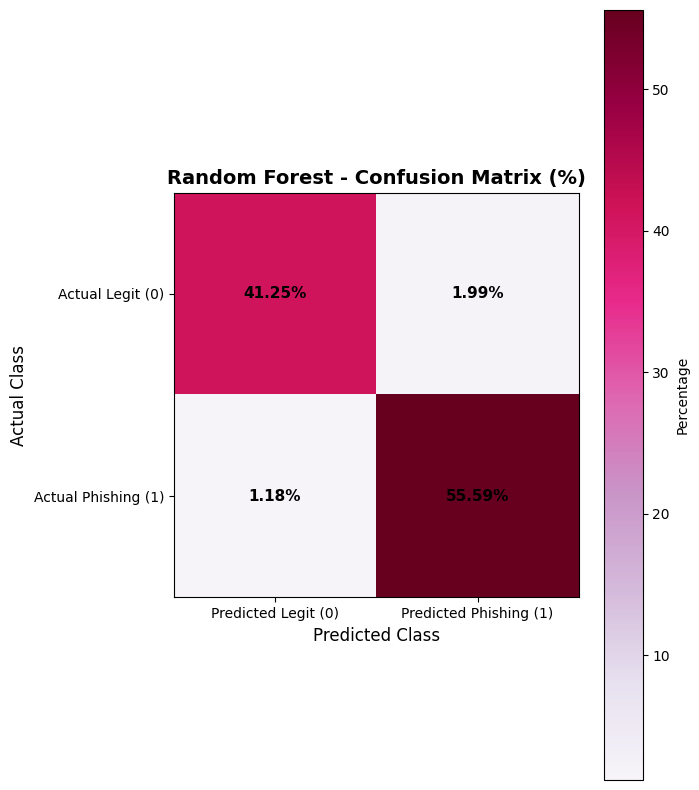

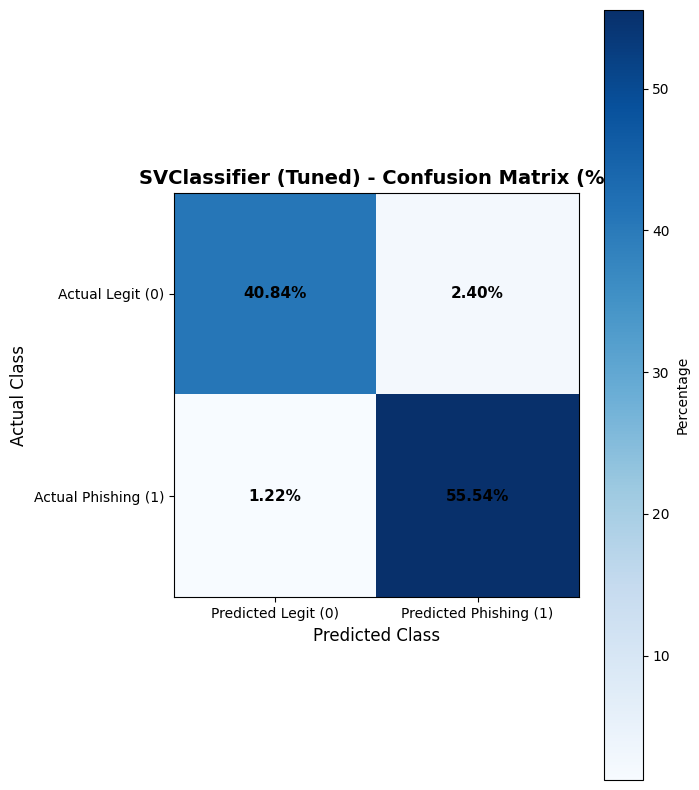

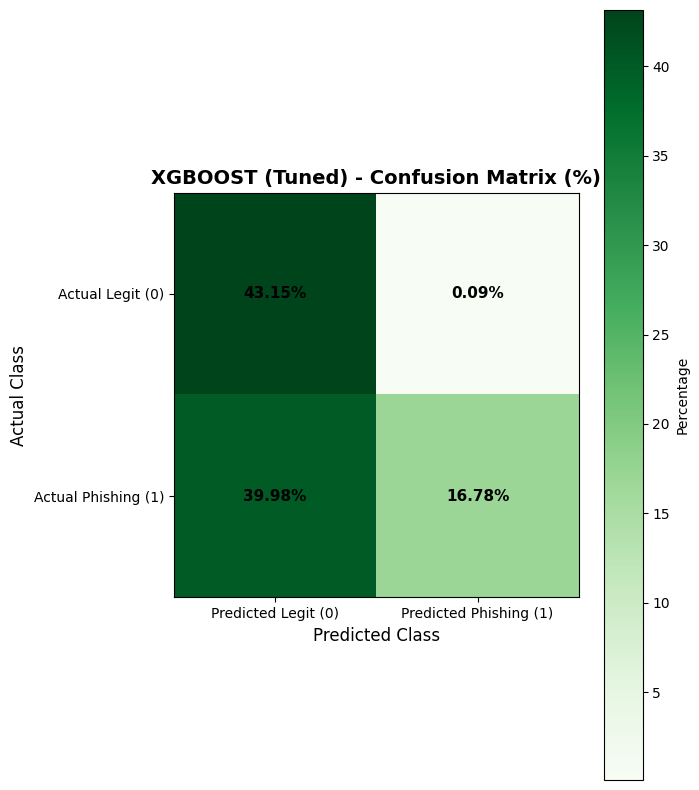

In [32]:
# Normalize to percentage
rf_cm_percent = rf_cm.astype("float") / rf_cm.sum() * 100

plt.figure(figsize=(7, 8))
plt.imshow(rf_cm_percent, interpolation="nearest", cmap="PuRd")
plt.title("Random Forest - Confusion Matrix (%)", fontsize=14, fontweight="bold")
plt.colorbar(label="Percentage")

# Axis labels
plt.xticks([0, 1], ["Predicted Legit (0)", "Predicted Phishing (1)"], fontsize=10)
plt.yticks([0, 1], ["Actual Legit (0)", "Actual Phishing (1)"], fontsize=10)
plt.ylabel("Actual Class", fontsize=12)
plt.xlabel("Predicted Class", fontsize=12)

# Annotate cells with percentage
for i in range(rf_cm_percent.shape[0]):
    for j in range(rf_cm_percent.shape[1]):
        plt.text(j, i, f"{rf_cm_percent[i, j]:.2f}%", 
                 ha="center", va="center", color="black", fontsize=11, fontweight="bold")

plt.tight_layout()

#for svm tuned
svm_cm_percent = svm_cm.astype("float") / cm.sum() * 100

plt.figure(figsize=(7, 8))
plt.imshow(svm_cm_percent, interpolation="nearest", cmap="Blues")
plt.title("SVClassifier (Tuned) - Confusion Matrix (%)", fontsize=14, fontweight="bold")
plt.colorbar(label="Percentage")

# Axis labels
plt.xticks([0, 1], ["Predicted Legit (0)", "Predicted Phishing (1)"], fontsize=10)
plt.yticks([0, 1], ["Actual Legit (0)", "Actual Phishing (1)"], fontsize=10)
plt.ylabel("Actual Class", fontsize=12)
plt.xlabel("Predicted Class", fontsize=12)

# Annotate cells with percentage
for i in range(svm_cm_percent.shape[0]):
    for j in range(svm_cm_percent.shape[1]):
        plt.text(j, i, f"{svm_cm_percent[i, j]:.2f}%", 
                 ha="center", va="center", color="black", fontsize=11, fontweight="bold")

plt.tight_layout()

#for xgboost tuned
xgb_cm_percent = xgb_cm.astype("float") / xgb_cm.sum() * 100

plt.figure(figsize=(7, 8))
plt.imshow(xgb_cm_percent, interpolation="nearest", cmap="Greens")
plt.title("XGBOOST (Tuned) - Confusion Matrix (%)", fontsize=14, fontweight="bold")
plt.colorbar(label="Percentage")

# Axis labels
plt.xticks([0, 1], ["Predicted Legit (0)", "Predicted Phishing (1)"], fontsize=10)
plt.yticks([0, 1], ["Actual Legit (0)", "Actual Phishing (1)"], fontsize=10)
plt.ylabel("Actual Class", fontsize=12)
plt.xlabel("Predicted Class", fontsize=12)

# Annotate cells with percentage
for i in range(xgb_cm_percent.shape[0]):
    for j in range(xgb_cm_percent.shape[1]):
        plt.text(j, i, f"{xgb_cm_percent[i, j]:.2f}%", 
                 ha="center", va="center", color="black", fontsize=11, fontweight="bold")

plt.tight_layout()

plt.show()


## Comparison of Confusion Matrix of all Models

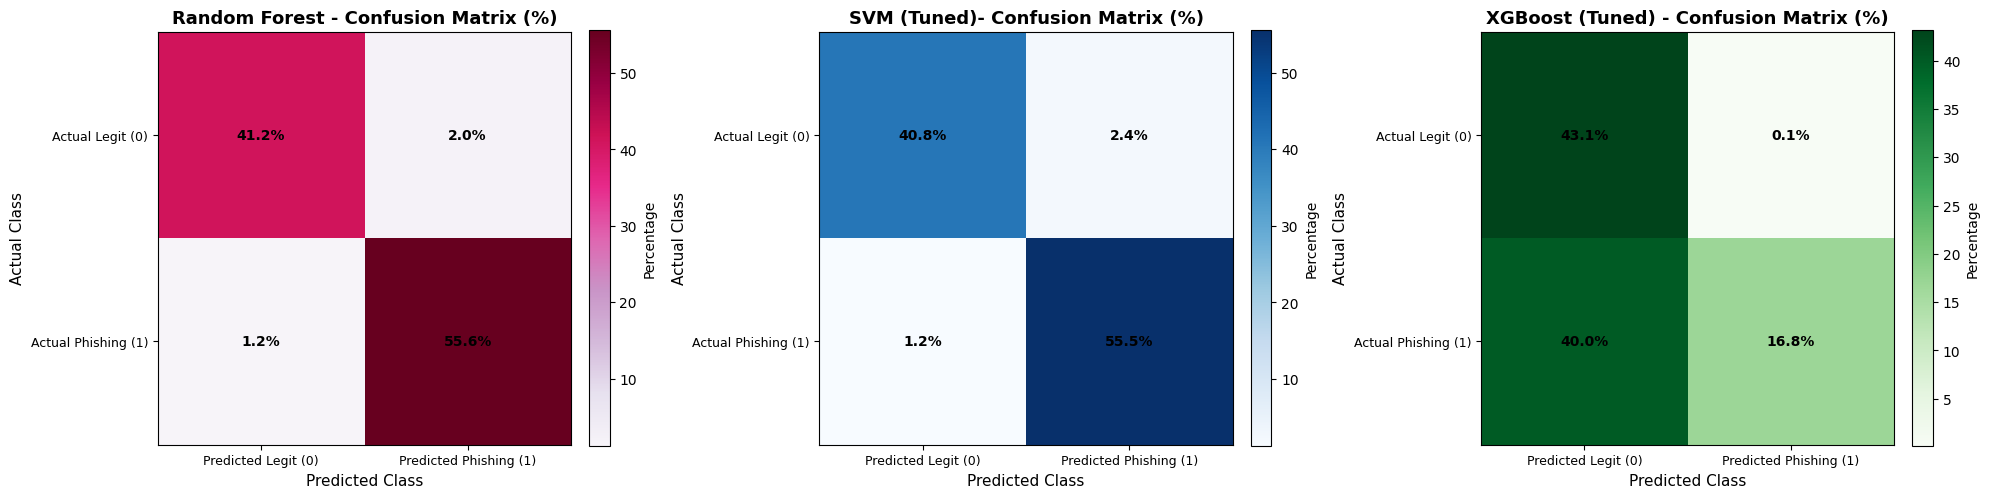

In [33]:
#  Normalize Confusion Matrices to Percentage
rf_cm_percent   = rf_cm.astype("float") / rf_cm.sum() * 100
svm_cm_percent  = svm_cm.astype("float") / cm.sum() * 100
xgb_cm_percent  = xgb_cm.astype("float") / xgb_cm.sum() * 100

#  Create Figure with Subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ================= Random Forest =================
im1 = axes[0].imshow(rf_cm_percent, interpolation="nearest", cmap="PuRd")
axes[0].set_title("Random Forest - Confusion Matrix (%)", fontsize=13, fontweight="bold")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Predicted Legit (0)", "Predicted Phishing (1)"], fontsize=9)
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(["Actual Legit (0)", "Actual Phishing (1)"], fontsize=9)
axes[0].set_ylabel("Actual Class", fontsize=11)
axes[0].set_xlabel("Predicted Class", fontsize=11)

for i in range(rf_cm_percent.shape[0]):
    for j in range(rf_cm_percent.shape[1]):
        axes[0].text(j, i, f"{rf_cm_percent[i, j]:.1f}%", ha="center", va="center",
                     color="black", fontsize=10, fontweight="bold")

fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, label="Percentage")

# ================= SVM =================
im2 = axes[1].imshow(svm_cm_percent, interpolation="nearest", cmap="Blues")
axes[1].set_title("SVM (Tuned)- Confusion Matrix (%)", fontsize=13, fontweight="bold")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Predicted Legit (0)", "Predicted Phishing (1)"], fontsize=9)
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(["Actual Legit (0)", "Actual Phishing (1)"], fontsize=9)
axes[1].set_ylabel("Actual Class", fontsize=11)
axes[1].set_xlabel("Predicted Class", fontsize=11)

for i in range(svm_cm_percent.shape[0]):
    for j in range(svm_cm_percent.shape[1]):
        axes[1].text(j, i, f"{svm_cm_percent[i, j]:.1f}%", ha="center", va="center",
                     color="black", fontsize=10, fontweight="bold")

fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, label="Percentage")

# ================= XGBoost =================
im3 = axes[2].imshow(xgb_cm_percent, interpolation="nearest", cmap="Greens")
axes[2].set_title("XGBoost (Tuned) - Confusion Matrix (%)", fontsize=13, fontweight="bold")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["Predicted Legit (0)", "Predicted Phishing (1)"], fontsize=9)
axes[2].set_yticks([0, 1])
axes[2].set_yticklabels(["Actual Legit (0)", "Actual Phishing (1)"], fontsize=9)
axes[2].set_ylabel("Actual Class", fontsize=11)
axes[2].set_xlabel("Predicted Class", fontsize=11)

for i in range(xgb_cm_percent.shape[0]):
    for j in range(xgb_cm_percent.shape[1]):
        axes[2].text(j, i, f"{xgb_cm_percent[i, j]:.1f}%", ha="center", va="center",
                     color="black", fontsize=10, fontweight="bold")

fig.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04, label="Percentage")

plt.tight_layout()
plt.show()


## Final Selected Models (SVM & Random Forest) Bar Chart

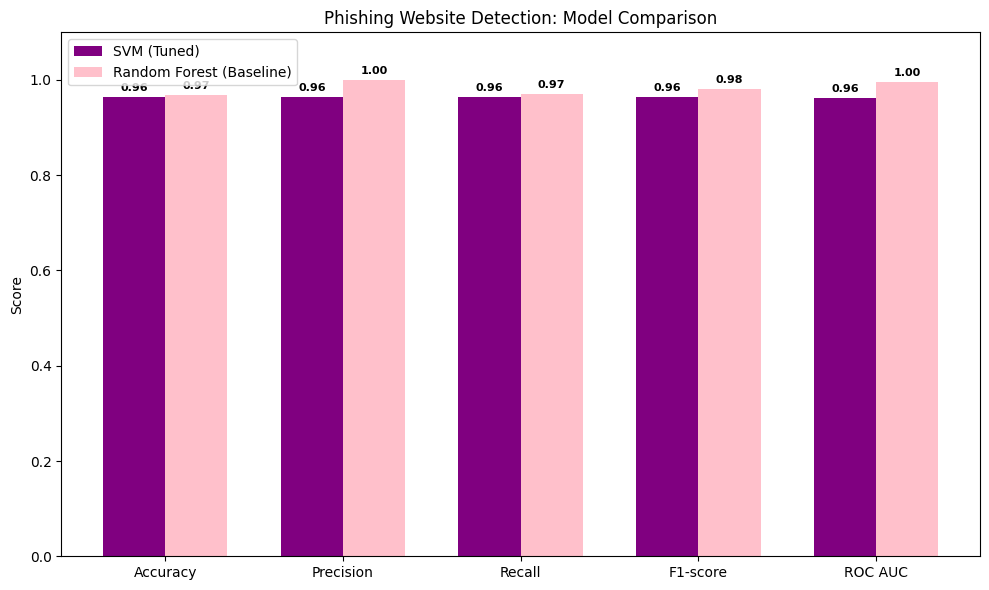

In [34]:
# Example results from your models (replace with real variables)
svm_acc = acc
svm_report = classification_report(y_test_svm, svm_predict, output_dict=True)
svm_precision = svm_report['weighted avg']['precision']
svm_recall = svm_report['weighted avg']['recall']
svm_f1 = svm_report['weighted avg']['f1-score']

svm_roc = svm_roc

rf_precision = float(rf_cr.split()[9])
rf_recall = float(rf_cr.split()[10])
rf_f1 = float(rf_cr.split()[11])
rf_acc = rf_acc
rf_roc = rf_roc 

# Metrics to compare
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]

# SVM and RF values
svm_scores = [svm_acc, svm_precision, svm_recall, svm_f1, svm_roc]
rf_scores = [rf_acc, rf_precision, rf_recall, rf_f1, rf_roc]

x = np.arange(len(metrics))  # positions
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width/2, svm_scores, width, label="SVM (Tuned)", color='purple')   
bars2 = ax.bar(x + width/2, rf_scores, width, label="Random Forest (Baseline)", color='pink')  

# Titles and labels
ax.set_ylabel("Score")
ax.set_title("Phishing Website Detection: Model Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, fontweight="bold")

plt.tight_layout()
plt.show()



> Among the three tested models, the Random Forest Classifier performed the best.  
> Therefore, a **CSV of its predictions** has been generated for reference and further analysis.

# Create Submission.csv

In [35]:
# Create submission.csv for demonstration purposes
submission = pd.DataFrame({
    "id": X_test.index,          
    "prediction": y_pred_rf      # predicted labels from Random Forest
})

# Save as CSV
submission.to_csv("rf_submission.csv", index=False)

print("✅ Submission CSV created: rf_submission.csv")

✅ Submission CSV created: rf_submission.csv
